$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


Customer_ID: A unique identifier for each customer.

Month: The month associated with the recorded data (e.g., transaction month or reporting month).

Name: The name of the customer.

Age: The age of the customer.

SSN: Social Security Number (or equivalent), a unique identifier for individuals.

Occupation: The occupation or job role of the customer.

Annual_Income: The total annual income of the customer.

Monthly_Inhand_Salary: The monthly take-home salary of the customer.

Num_Bank_Accounts: The number of bank accounts held by the customer.

Num_Credit_Card: The number of credit cards owned by the customer.

Interest_Rate: The interest rate on the customer's credit products (e.g., loans or credit cards).

Num_of_Loan: The number of loans the customer has taken.

Type_of_Loan: The type(s) of loans the customer has (e.g., personal, mortgage, auto).

Delay_from_due_date: The number of days the customer delays payments from the due date.

Num_of_Delayed_Payment: The number of times the customer has delayed payments.

Changed_Credit_Limit: Indicates whether the customer's credit limit has changed (possibly a binary or categorical feature).

Num_Credit_Inquiries: The number of times the customer's credit report has been accessed by lenders (credit inquiries).

Credit_Mix: The mix of credit types the customer has (e.g., revolving, installment).

Outstanding_Debt: The total outstanding debt the customer owes.

Credit_Utilization_Ratio: The ratio of the customer's credit card balances to their credit limits.

Credit_History_Age: The length of the customer's credit history (likely in months or years).

Payment_of_Min_Amount: Indicates whether the customer pays only the minimum amount due (possibly a binary or categorical feature).

Total_EMI_per_month: The total Equated Monthly Installment (EMI) the customer pays monthly for loans.

Amount_invested_monthly: The amount the customer invests monthly (if applicable).

Payment_Behaviour: Describes the customer's payment behavior (e.g., on-time, late, etc.).

Monthly_Balance: The monthly balance in the customer's account(s).

Credit_Score: The credit score of the customer, which reflects their creditworthiness.

In [4]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


#### from show the data i noticed that 
###### 1.the coustomer name repetead because it`s calculate month by month (can do group by to get insght)
###### 2.in sample 2 the age is -5000 and it is inconsistency
###### 3.there are many null values
###### 4.target is object


In [5]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### the insight from this is
###### 1.there are 28 coulumns the target is Credit_Score it is object coulumn 
###### 2.there are float64(4), int64(4), object(20)
###### 3.there are 100000 entries, 0 to 99999
###### 4.there are many null values in same coulumns like Amount_invested_monthly which is object and Num_Credit_Inquiries  which is float
###### 5.this deal with age and annual_income as object >> need to convert it to float



In [7]:
Numerical=train.select_dtypes(exclude='object').columns.tolist()
Numerical

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [8]:
categorical=train.select_dtypes(include='object').columns.tolist()
categorical

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [9]:
cols_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance','Num_of_Delayed_Payment',"Amount_invested_monthly"]
for col in cols_to_convert:
    train[col] = pd.to_numeric(train[col], errors='coerce')

In [10]:
train.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.style.background_gradient(cmap='viridis')

,count,mean,std,min,1%,25%,50%,75%,99%,max
Age,95061.000000,110.934505,689.407864,-500.000000,14.000000,24.000000,33.000000,42.000000,4177.400000,8698.000000
Annual_Income,93020.000000,178578.964199,1442878.388969,7005.930000,7534.185000,19435.600000,37550.740000,72843.380000,483847.780000,24198062.000000
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,531.875417,1625.568229,3093.745000,5957.448333,13814.930000,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,0.000000,3.000000,6.000000,7.000000,445.010000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,1.000000,4.000000,5.000000,7.000000,849.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,1.000000,8.000000,13.000000,20.000000,2865.010000,5797.000000
Num_of_Loan,95215.000000,2.780339,62.500940,-100.000000,-100.000000,1.000000,3.000000,5.000000,9.000000,1496.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,0.000000,10.000000,18.000000,28.000000,61.000000,67.000000
Num_of_Delayed_Payment,90254.000000,31.033051,226.955758,-3.000000,0.000000,9.000000,14.000000,18.000000,27.000000,4397.000000
Changed_Credit_Limit,97909.000000,10.389025,6.789496,-6.490000,-1.540000,5.320000,9.400000,14.870000,28.810000,36.970000


# the insight from this is (summarize)
#### 1.Age>>min is -500(this is not logic this is consistancy) && max and 99% is 4133 which is inconsistancy && there have many null value
#### 2.annaul_income>> may be need scaling && there have many null value
#### 3.Monthly_Inhand_Salary>> may be need scaling && there have many null value
#### 4.Num_Bank_Accounts >> this is min is -1 (not logic) inconsistancy && have outliers
#### 5.Num_Credit_Card >>may be there are outliers
#### 6.Interest_Rate>> there is outliers
#### 7.Num_of_Loan>>there have many null value && min is -100 (there is may be not logic)&& there is outliers
#### 8.Num_of_Delayed_Payment>> there is outliers and null values
#### 9.Changed_Credit_Limit>> null value
#### 10.Total_EMI_per_month>> outliers
#### 11. Monthly_Balance>> min is 0.007760 
###### 1.there is high variance in some coulumn like Total_EMI_per_month 
###### 2.there is maybe outliers in some coulumns like Num_Bank_Accounts and Num_Credit_Card

# the insight from this is (in details)

## Age
- 4,939 missing values
- Negative values (minimum: -500) are impossible for age
- Maximum age of 8,698 is impossible
- 99th percentile at 4,177 indicates many unrealistic values

## Annual_Income
- 6,980 missing values
- Extremely high standard deviation (1,442,878)
- Maximum value (24,198,062) appears unusually high
- Large gap between 75th percentile (72,843) and maximum

## Monthly_Inhand_Salary
- Large number of missing values (15,002)
- Doesn't align with annual income when divided by 12
- High standard deviation relative to mean

## Num_Bank_Accounts
- Negative values present (minimum: -1)
- Maximum of 1,798 accounts is unrealistic
- High standard deviation (117.40) indicates severe outliers
- Mean (17.09) is unrealistically high for typical consumer

## Num_Credit_Card
- Maximum of 1,499 credit cards is unrealistic
- High standard deviation (129.06) indicates severe outliers
- Mean (22.47) is unrealistically high for typical consumer

## Interest_Rate
- Maximum rate of 5,797% is unrealistic
- High standard deviation (466.42) suggests severe outliers
- Mean (72.47%) is unusually high for typical interest rates

## Num_of_Loan
- 4,785 missing values
- Negative values present (minimum: -100)
- Maximum of 1,496 loans is unrealistic
- High standard deviation (62.50) relative to mean

## Delay_from_due_date
- Negative delays present (minimum: -5)
- Unit of measurement unclear (days/months/years)

## Num_of_Delayed_Payment
- 9,746 missing values
- Negative values present (minimum: -3)
- Maximum of 4,397 delayed payments is unrealistic
- High standard deviation (226.96) indicates severe outliers

## Changed_Credit_Limit
- 2,091 missing values
- Negative values present (minimum: -6.49)
- Purpose and unit of measurement unclear

## Credit_Utilization_Ratio
- Minimum of 20% seems unusually high as lower bound
- Narrow range (20-50%) might indicate data truncation
- Perfect 100% data completion seems suspicious

## Total_EMI_per_month
- High standard deviation (8,306.04) indicates severe outliers
- Maximum (82,331) seems unusually high
- Large gap between 75th percentile and maximum

## Amount_invested_monthly
- 8,784 missing values
- Currency unit not specified
- Zero values need verification

## Monthly_Balance
- 1,209 missing values
- Some very low balances (minimum: 0.008) need verification
- Currency unit not specified

In [11]:
train.describe(include="object").style.background_gradient(cmap='coolwarm')

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,90015,100000,100000,88592,100000,90970,100000,100000,100000
unique,100000,12500,8,10139,12501,16,6260,4,404,3,7,3
top,0x1602,CUS_0xd40,January,Langep,#F%$D@*&8,_______,Not Specified,Standard,15 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12500,44,5572,7062,1408,36479,446,52326,25513,53174


##### insigth from this 
###### 1.there are  unique 12500 Customer_ID and 10139 Name (null values in name maybe fill by coustomer id)
###### 2.there are unique 1788 Age and 18940 Annual_Income ,13178 Outstanding_Debt (they must be numerical)


#### cheking unique value

In [12]:
for col in list(train.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)

    # Display the first 10 rows (or all if less than 10)
    if value_count_df.shape[0] > 10:
        display(value_count_df.head(10))
    else:
        display(value_count_df)
    
    print("\n" + "-"*40 + "\n")  # Separator for readability

Column: ID's count values:



,Value,Count
0,0x1602,1
1,0x19c88,1
2,0x19caa,1
3,0x19ca5,1
4,0x19ca4,1
5,0x19ca3,1
6,0x19ca2,1
7,0x19ca1,1
8,0x19ca0,1
9,0x19c9f,1



----------------------------------------

Column: Customer_ID's count values:



,Value,Count
0,CUS_0xd40,8
1,CUS_0x9bf4,8
2,CUS_0x5ae3,8
3,CUS_0xbe9a,8
4,CUS_0x4874,8
5,CUS_0xc67b,8
6,CUS_0x8a64,8
7,CUS_0x35ea,8
8,CUS_0x5044,8
9,CUS_0x9dfd,8



----------------------------------------

Column: Month's count values:



,Value,Count
0,January,12500
1,February,12500
2,March,12500
3,April,12500
4,May,12500
5,June,12500
6,July,12500
7,August,12500



----------------------------------------

Column: Name's count values:



,Value,Count
0,Langep,44
1,Stevex,44
2,Vaughanl,39
3,Jessicad,39
4,Raymondr,38
5,Danielz,38
6,Deepa Seetharamanm,38
7,Jessica Wohlt,38
8,Nate Raymondw,37
9,Nicko,37



----------------------------------------

Column: SSN's count values:



,Value,Count
0,#F%$D@*&8,5572
1,078-73-5990,8
2,486-78-3816,8
3,750-67-7525,8
4,903-50-0305,8
5,376-28-6303,8
6,194-93-5515,8
7,442-30-8588,8
8,362-78-8068,8
9,221-76-9774,8



----------------------------------------

Column: Occupation's count values:



,Value,Count
0,_______,7062
1,Lawyer,6575
2,Architect,6355
3,Engineer,6350
4,Scientist,6299
5,Mechanic,6291
6,Accountant,6271
7,Developer,6235
8,Media_Manager,6232
9,Teacher,6215



----------------------------------------

Column: Type_of_Loan's count values:



,Value,Count
0,Not Specified,1408
1,Credit-Builder Loan,1280
2,Personal Loan,1272
3,Debt Consolidation Loan,1264
4,Student Loan,1240
5,Payday Loan,1200
6,Mortgage Loan,1176
7,Auto Loan,1152
8,Home Equity Loan,1136
9,"Personal Loan, and Student Loan",320



----------------------------------------

Column: Credit_Mix's count values:



,Value,Count
0,Standard,36479
1,Good,24337
2,_,20195
3,Bad,18989



----------------------------------------

Column: Credit_History_Age's count values:



,Value,Count
0,15 Years and 11 Months,446
1,19 Years and 4 Months,445
2,19 Years and 5 Months,444
3,17 Years and 11 Months,443
4,19 Years and 3 Months,441
5,17 Years and 9 Months,438
6,15 Years and 10 Months,436
7,17 Years and 10 Months,435
8,15 Years and 9 Months,432
9,18 Years and 3 Months,428



----------------------------------------

Column: Payment_of_Min_Amount's count values:



,Value,Count
0,Yes,52326
1,No,35667
2,NM,12007



----------------------------------------

Column: Payment_Behaviour's count values:



,Value,Count
0,Low_spent_Small_value_payments,25513
1,High_spent_Medium_value_payments,17540
2,Low_spent_Medium_value_payments,13861
3,High_spent_Large_value_payments,13721
4,High_spent_Small_value_payments,11340
5,Low_spent_Large_value_payments,10425
6,!@9#%8,7600



----------------------------------------

Column: Credit_Score's count values:



,Value,Count
0,Standard,53174
1,Poor,28998
2,Good,17828



----------------------------------------



Corrupt/Invalid Values: SSN, Payment Behaviour ("!@9#%8"), Credit Mix ("_").

Missing/Unknown Data: Occupation ("_______"), Type of Loan ("Not Specified"), Payment of Min Amount ("NM").

Credit History Age: Needs standardization (convert "X Years and Y Months" to total months).

Credit Score: Class imbalance (most users have "Standard", few have "Good").

##### checking null values

In [13]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                             0
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

##### checking outlier

In [14]:
number_of_outliers = [None] * len(train.select_dtypes(include=["number"]).columns)
q95 = [None] * len(train.select_dtypes(include=["number"]).columns)
q5 = [None] * len(train.select_dtypes(include=["number"]).columns)
total_rows = len(train)
for i, p in enumerate(train.select_dtypes(include=["number"]).columns):
    q95[i], q5[i] = np.percentile(train[p], [95, 5])
    outliers = (train[p] > q95[i]) | (train[p] < q5[i])
    number_of_outliers[i] = outliers.sum()
    print(f'Outliers in {p} = {number_of_outliers[i]}')
    print("*" * 40)
  

Outliers in Age = 0
****************************************
Outliers in Annual_Income = 0
****************************************
Outliers in Monthly_Inhand_Salary = 0
****************************************
Outliers in Num_Bank_Accounts = 5673
****************************************
Outliers in Num_Credit_Card = 6601
****************************************
Outliers in Interest_Rate = 6219
****************************************
Outliers in Num_of_Loan = 0
****************************************
Outliers in Delay_from_due_date = 9016
****************************************
Outliers in Num_of_Delayed_Payment = 0
****************************************
Outliers in Changed_Credit_Limit = 0
****************************************
Outliers in Num_Credit_Inquiries = 0
****************************************
Outliers in Outstanding_Debt = 0
****************************************
Outliers in Credit_Utilization_Ratio = 10000
****************************************
Outliers in Tota

#### there are some outlliers in some coulumns such Total_EMI_per_month  and Interest_Rate  

#### check duplicated 

In [15]:
print(f'Nubmer of duplicated recrods = {train.duplicated().sum()}')

Nubmer of duplicated recrods = 0


##### converting coulumns

In [16]:
cols_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance','Num_of_Delayed_Payment',"Amount_invested_monthly"]
for col in cols_to_convert:
    train[col] = pd.to_numeric(train[col], errors='coerce')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

## UNI

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Amount_invested_monthly'}>, <Axes: >,
        <Axes: >]], dtype=object)

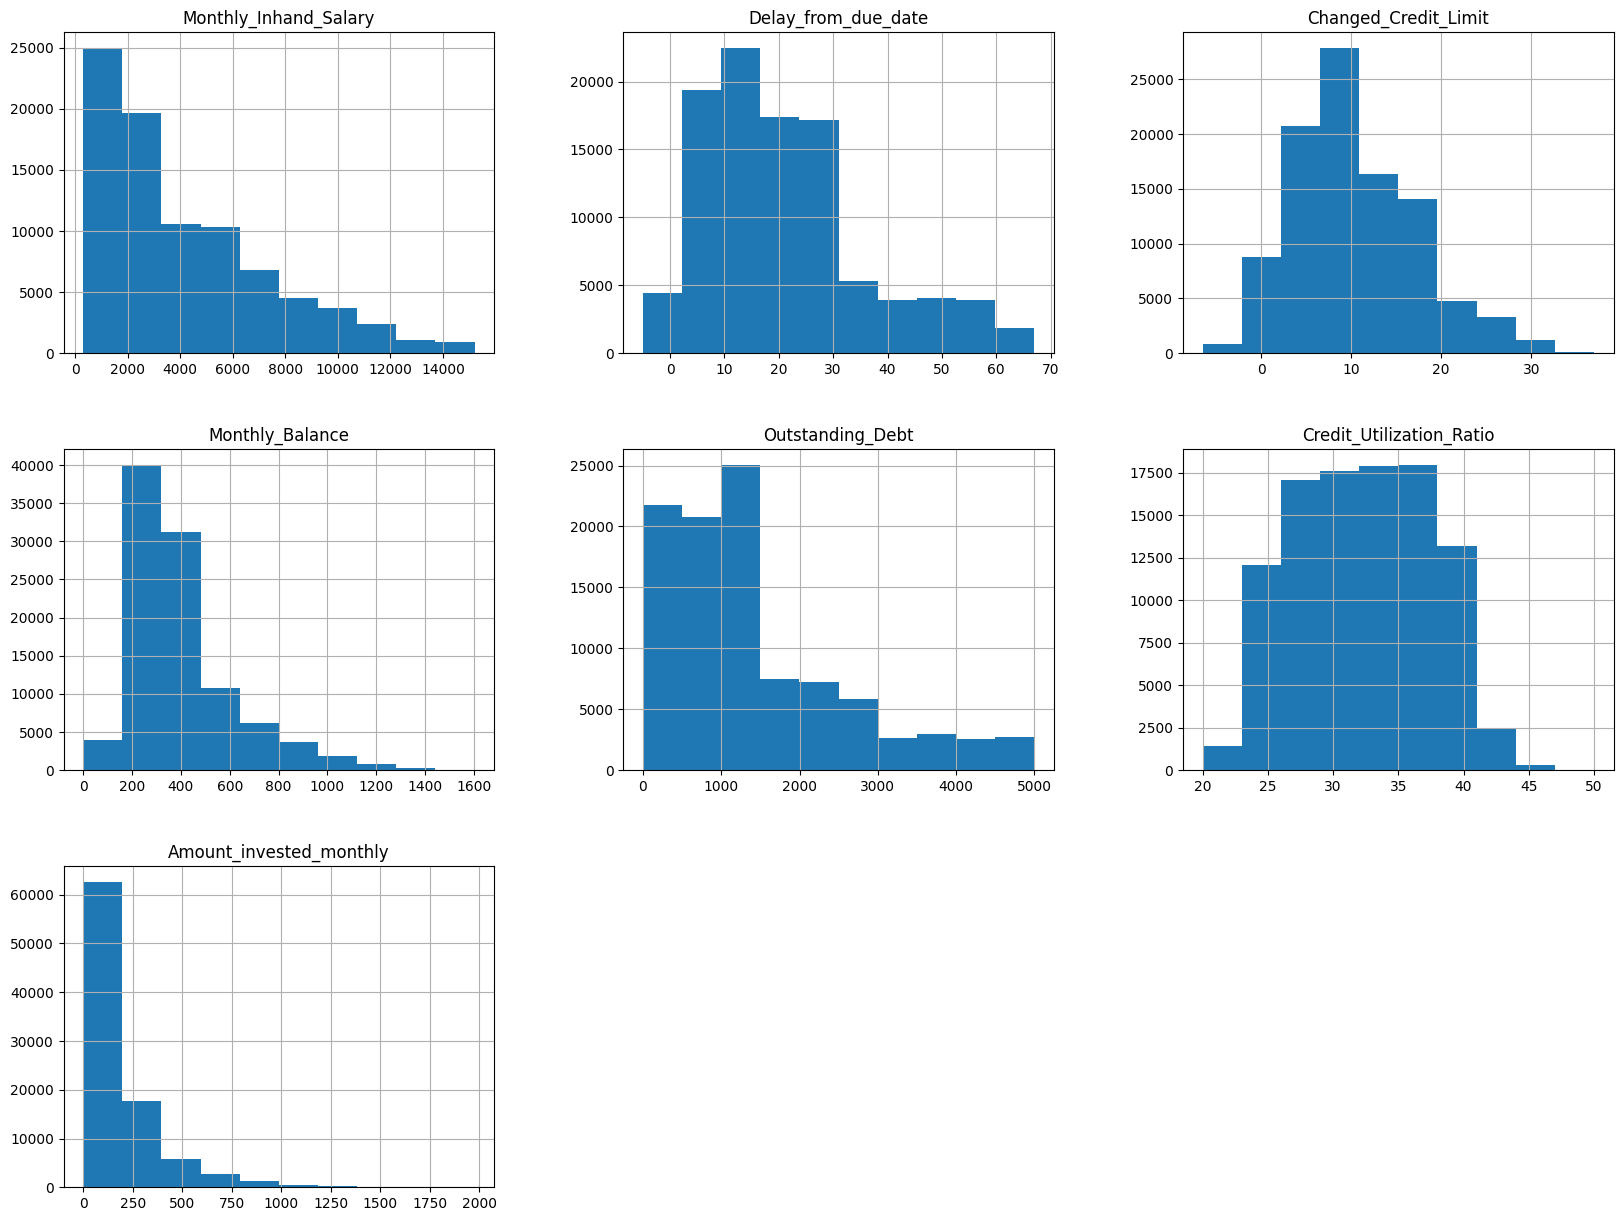

In [17]:
train[["Monthly_Inhand_Salary","Delay_from_due_date","Changed_Credit_Limit","Monthly_Balance","Outstanding_Debt","Credit_Utilization_Ratio","Amount_invested_monthly"]].hist(figsize=(20,15))

## Highly Skewed Features 

Monthly Inhand Salary
Monthly Balance
Outstanding Debt
Amount Invested Monthly
## Right-Skewed Features

Delay from Due Date
Changed Credit Limit




In [18]:
data_new=train[["Age","Annual_Income","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Num_Credit_Inquiries","Total_EMI_per_month","Num_of_Delayed_Payment"]]


C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


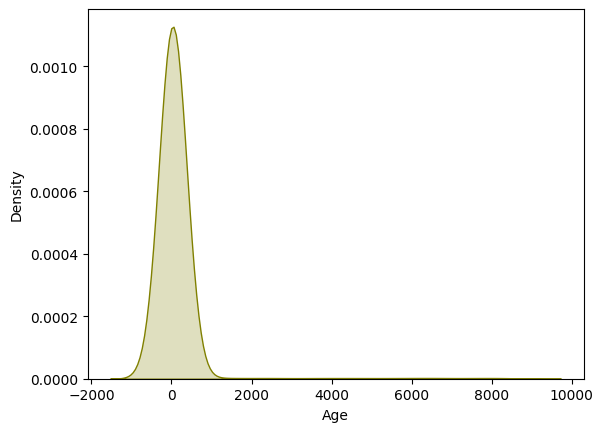

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


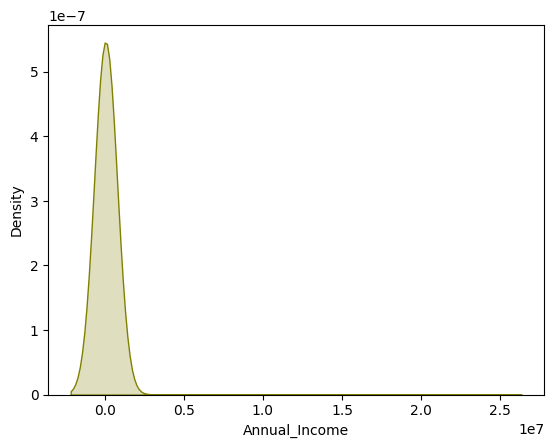

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


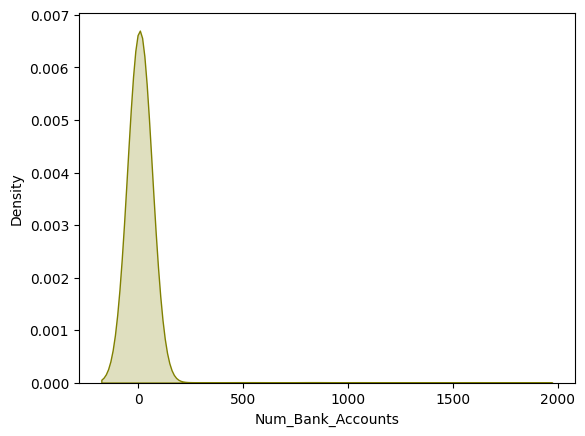

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


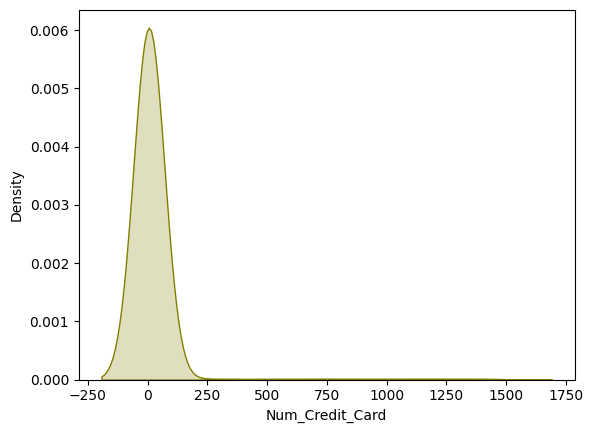

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


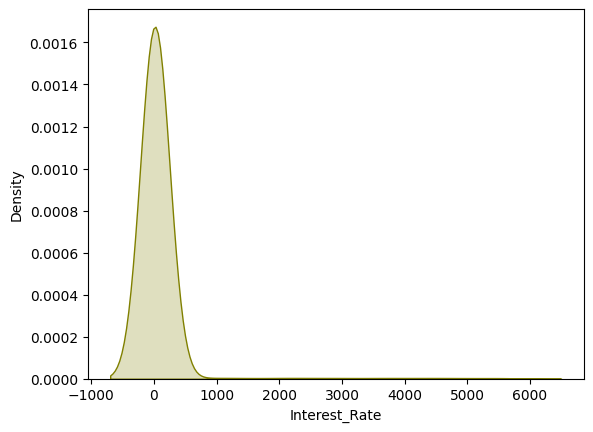

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


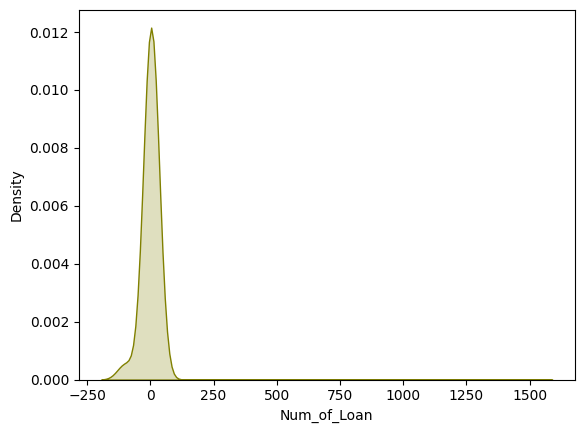

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


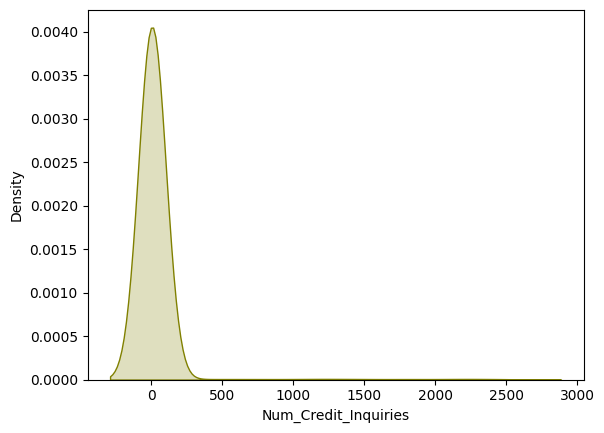

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


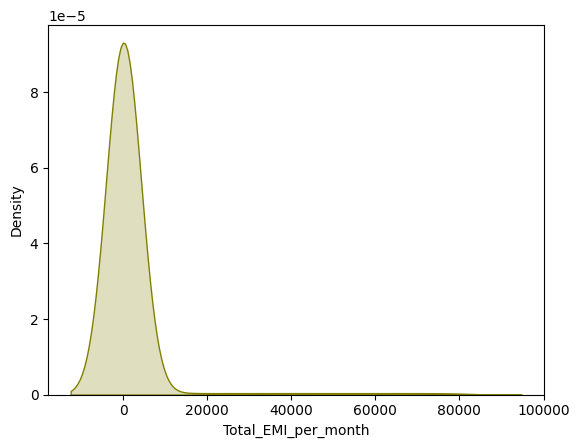

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_1484\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


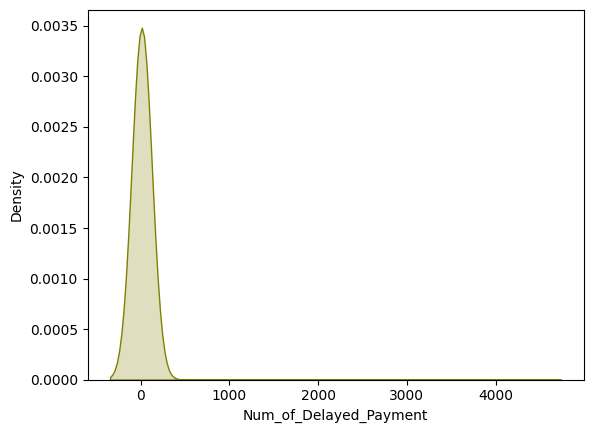

In [19]:
for i in data_new:
    sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
    plt.show()

<Axes: xlabel='count', ylabel='Occupation'>

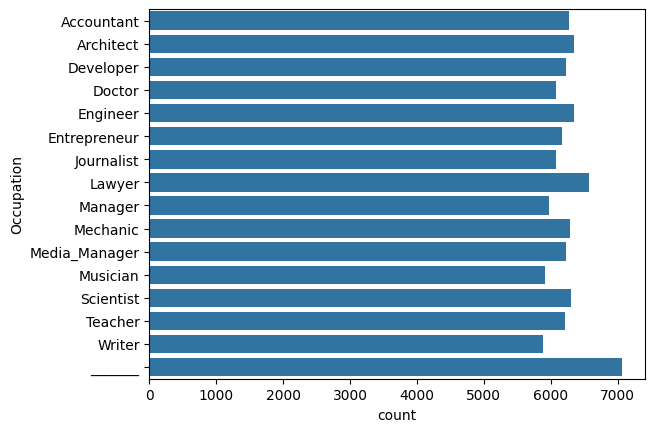

In [20]:
sns.countplot(train["Occupation"].sort_values())

<Axes: ylabel='count'>

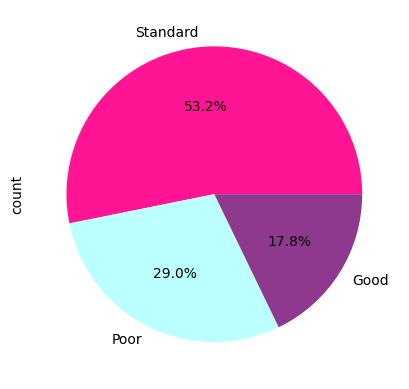

In [21]:
round(train['Credit_Score'].value_counts()/train.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",
                                                            colors = ["#FF1493" , "#BBFFFF"   , '#8E388E'] )

###### may be imbalance

In [22]:
train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

<Axes: ylabel='count'>

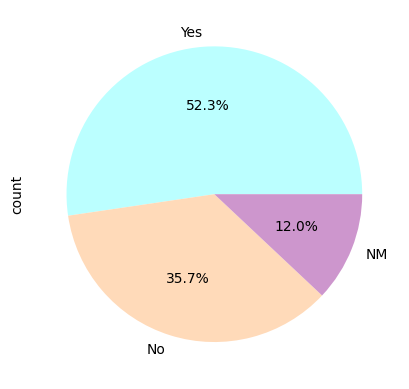

In [23]:
round(train['Payment_of_Min_Amount'].value_counts()/train.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",
                                                            colors = [ "#BBFFFF" , '#FFDAB9' , '#CD96CD'] )

In [24]:
train["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\3386663289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Not Specified'),
  Text(1, 0, 'Credit-Builder Loan'),
  Text(2, 0, 'Personal Loan'),
  Text(3, 0, 'Debt Consolidation Loan'),
  Text(4, 0, 'Student Loan'),
  Text(5, 0, 'Payday Loan'),
  Text(6, 0, 'Mortgage Loan'),
  Text(7, 0, 'Auto Loan'),
  Text(8, 0, 'Home Equity Loan'),
  Text(9, 0, 'Personal Loan, and Student Loan')])

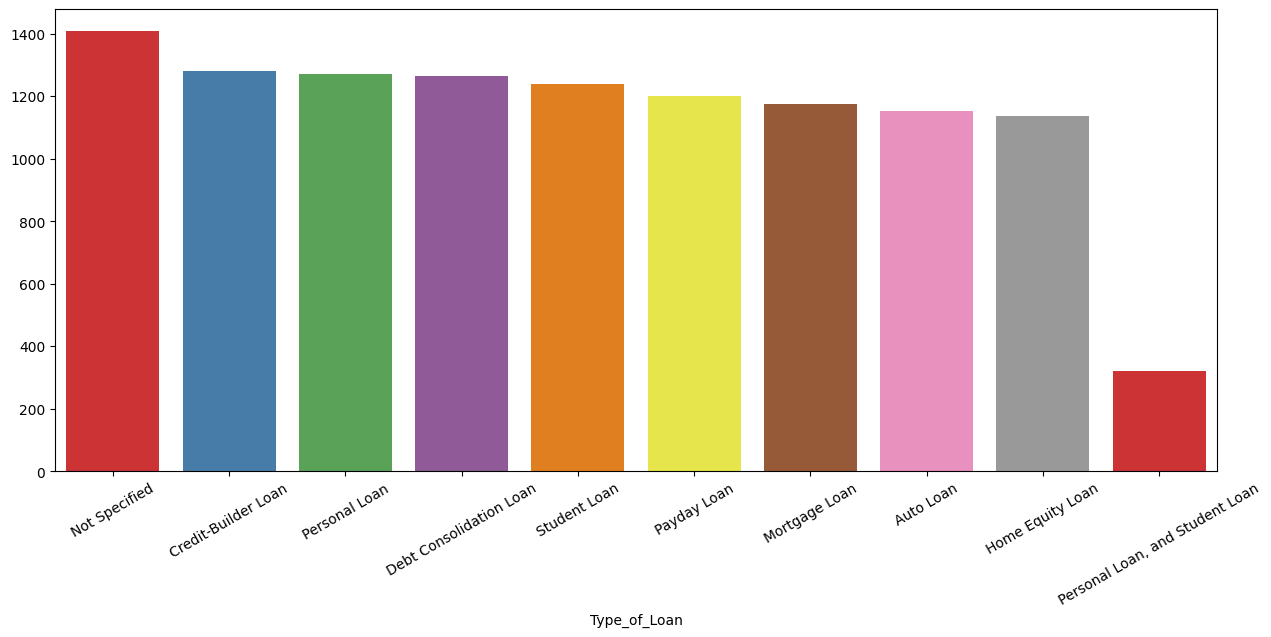

In [25]:
# Count occurrences of each unique value
top_10_values = train['Type_of_Loan'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")
plt.xticks(rotation=30)


In [26]:
train["Credit_Mix"].value_counts()


Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [27]:
train["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [28]:
train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\259249501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Payment_Behaviour"], palette="Set2")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'High_spent_Small_value_payments'),
  Text(1, 0, 'Low_spent_Large_value_payments'),
  Text(2, 0, 'Low_spent_Medium_value_payments'),
  Text(3, 0, 'Low_spent_Small_value_payments'),
  Text(4, 0, 'High_spent_Medium_value_payments'),
  Text(5, 0, '!@9#%8'),
  Text(6, 0, 'High_spent_Large_value_payments')])

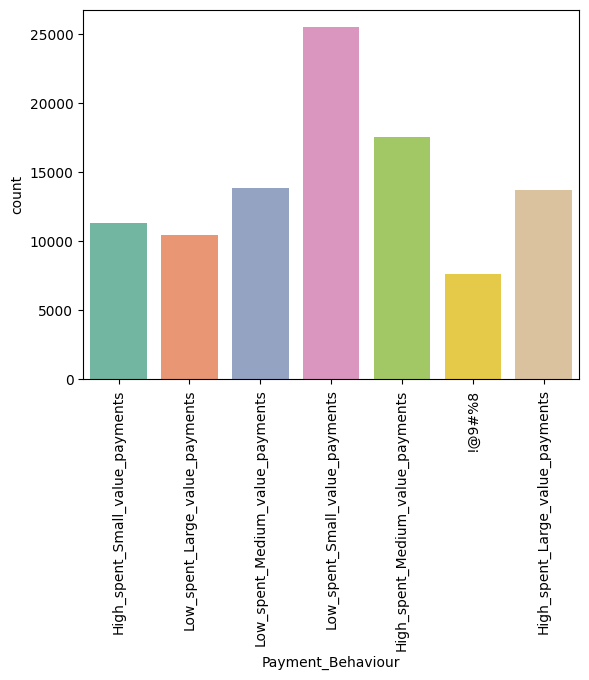

In [29]:
sns.countplot(x=train["Payment_Behaviour"], palette="Set2")
plt.xticks(rotation=90) 

In [30]:
train["Credit_History_Age"].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_1484\3616295616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '15 Years and 11 Months'),
  Text(1, 0, '19 Years and 4 Months'),
  Text(2, 0, '19 Years and 5 Months'),
  Text(3, 0, '17 Years and 11 Months'),
  Text(4, 0, '19 Years and 3 Months'),
  Text(5, 0, '17 Years and 9 Months'),
  Text(6, 0, '15 Years and 10 Months'),
  Text(7, 0, '17 Years and 10 Months'),
  Text(8, 0, '15 Years and 9 Months'),
  Text(9, 0, '18 Years and 3 Months')])

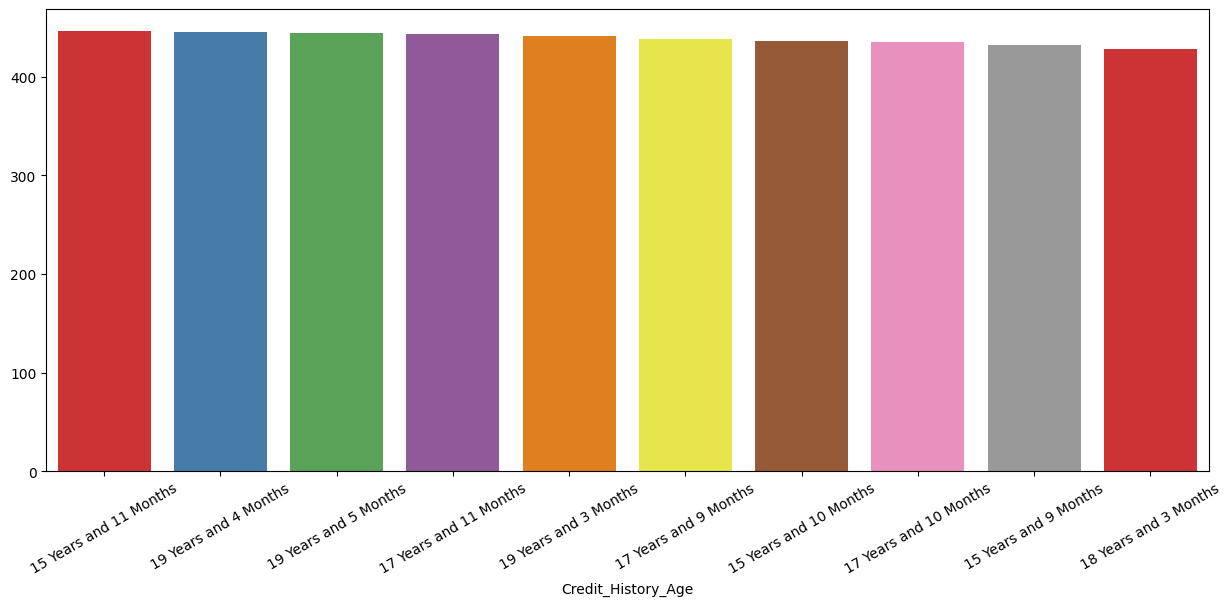

In [31]:
top_10_values = train['Credit_History_Age'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")
plt.xticks(rotation=30)

## BI & Tri

<Axes: >

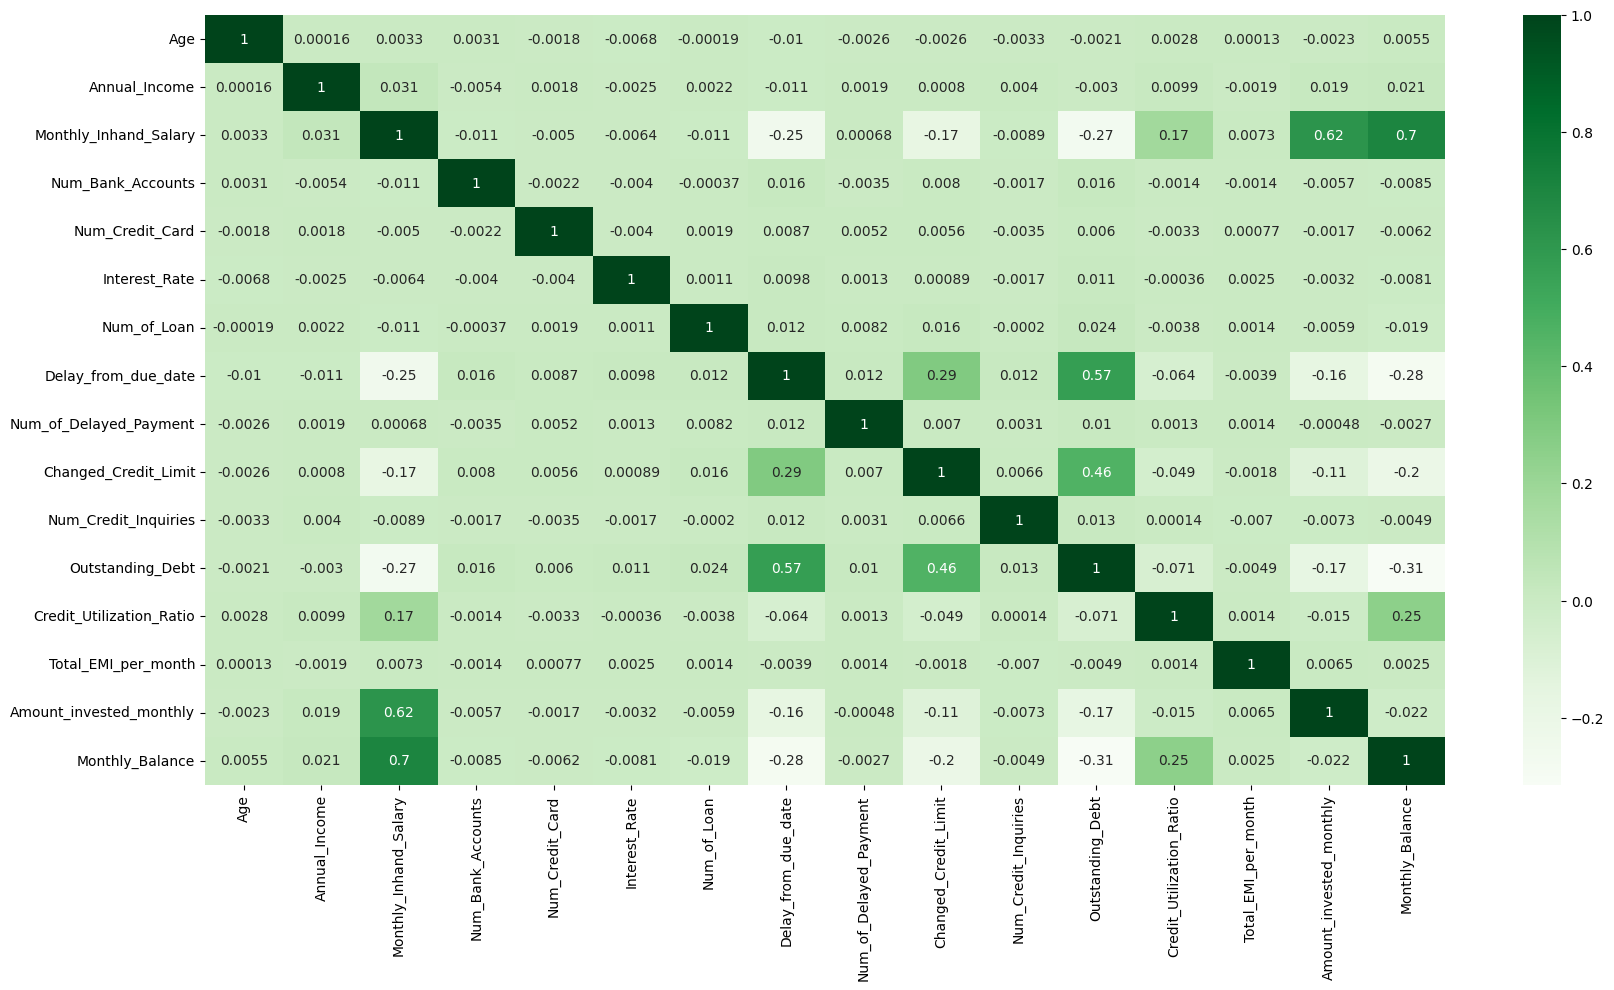

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr(),annot = True , cmap = "Greens")


Text(0, 0.5, 'Annual Income')

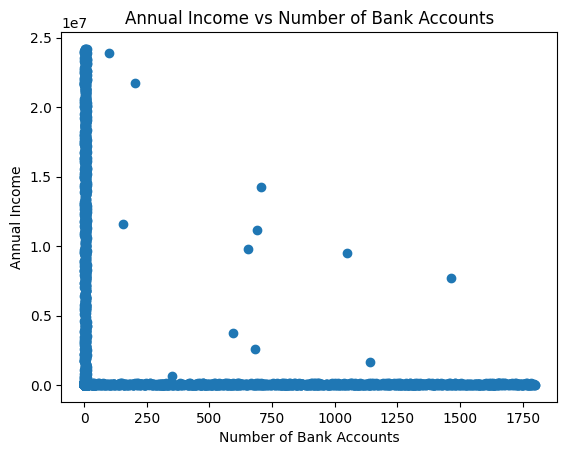

In [33]:
plt.scatter(train['Num_Bank_Accounts'],train['Annual_Income'])
plt.title('Annual Income vs Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Annual Income')

Text(0, 0.5, 'num_of_loans')

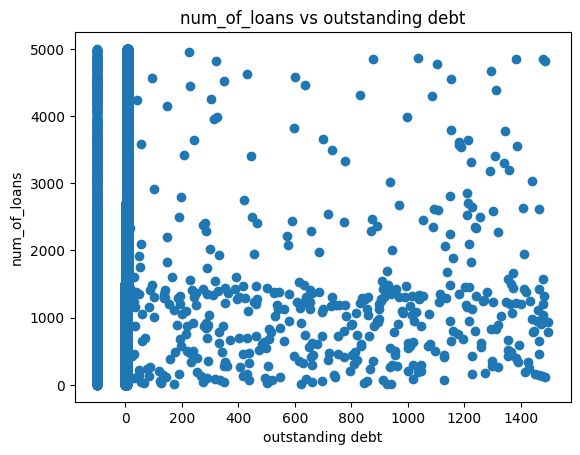

In [34]:
plt.scatter(train['Num_of_Loan'],train['Outstanding_Debt'])
plt.title('num_of_loans vs outstanding debt')
plt.xlabel('outstanding debt')
plt.ylabel('num_of_loans')

In [35]:
avg_balance_by_behavior = train.groupby('Payment_Behaviour')['Monthly_Balance'].mean().sort_values(ascending=False)
print("\nAverage Monthly Balance by Payment Behavior:")
print(avg_balance_by_behavior)


Average Monthly Balance by Payment Behavior:
Payment_Behaviour
High_spent_Large_value_payments     626.440897
High_spent_Medium_value_payments    490.250590
!@9#%8                              401.532751
High_spent_Small_value_payments     396.972252
Low_spent_Medium_value_payments     345.840987
Low_spent_Large_value_payments      344.270217
Low_spent_Small_value_payments      274.329913
Name: Monthly_Balance, dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'High_spent_Large_value_payments'),
  Text(1, 0, 'High_spent_Medium_value_payments'),
  Text(2, 0, '!@9#%8'),
  Text(3, 0, 'High_spent_Small_value_payments'),
  Text(4, 0, 'Low_spent_Medium_value_payments'),
  Text(5, 0, 'Low_spent_Large_value_payments'),
  Text(6, 0, 'Low_spent_Small_value_payments')])

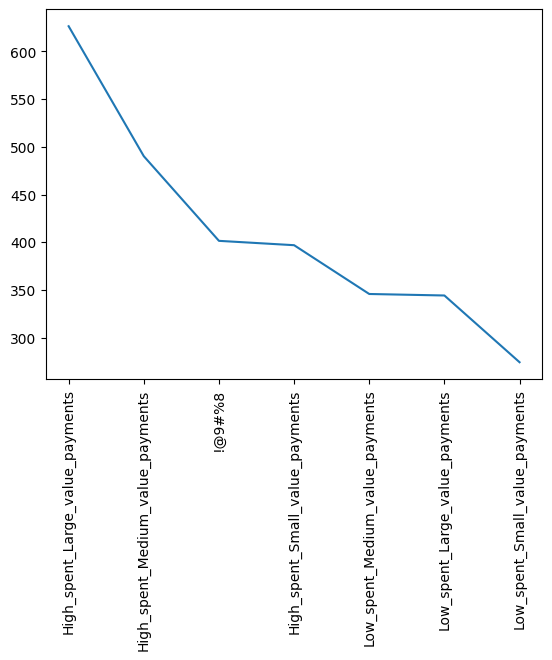

In [36]:
plt.plot(avg_balance_by_behavior)
plt.xticks(rotation=90)


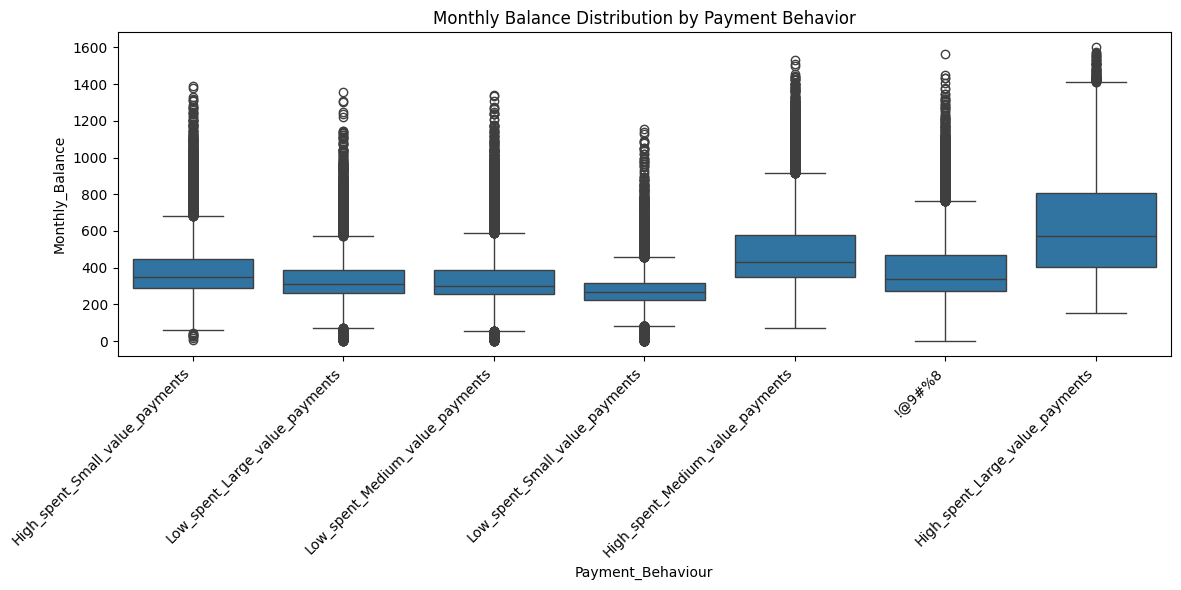

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment_Behaviour', y='Monthly_Balance', data=train)
plt.title('Monthly Balance Distribution by Payment Behavior')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
credit_EMI=train.groupby('Credit_Score')['Total_EMI_per_month'].agg(['mean', 'median', 'std']).round(2)
credit_EMI

,mean,median,std
Credit_Score,,,
Good,1477.20,64.81,8464.75
Poor,1363.93,77.71,8182.99
Standard,1399.65,65.87,8318.92


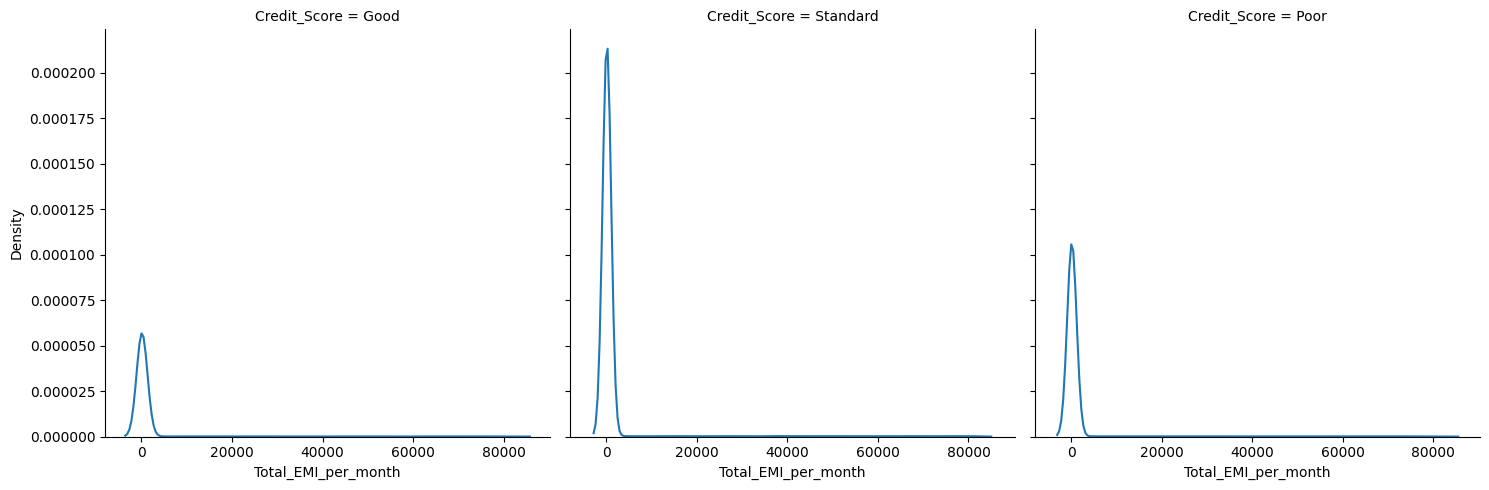

In [39]:
sns.displot(data=train, x="Total_EMI_per_month", col="Credit_Score" , kind = "kde")

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

### deal with coulumns

In [40]:
train[["Age","Num_Bank_Accounts","Num_of_Loan"]].describe(percentiles=[0.01, 0.25, 0.5, 0.75,0.98 ,0.99])

,Age,Num_Bank_Accounts,Num_of_Loan
count,95061.000000,100000.000000,95215.000000
mean,110.934505,17.091280,2.780339
std,689.407864,117.404834,62.500940
min,-500.000000,-1.000000,-100.000000
1%,14.000000,0.000000,-100.000000
25%,24.000000,3.000000,1.000000
50%,33.000000,6.000000,3.000000
75%,42.000000,7.000000,5.000000
98%,56.000000,10.000000,9.000000
99%,4177.400000,445.010000,9.000000


In [41]:

cols = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan']
percentile_98 = train[cols].quantile(0.98)
for col in cols:
    train.loc[(train[col] > percentile_98[col]) | (train[col] < 0), col] = np.nan
print(train[cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))


                Age  Num_Bank_Accounts   Num_of_Loan
count  92365.000000       98655.000000  90892.000000
mean      33.314145           5.368466      3.534172
std       10.770143           2.592011      2.447488
min       14.000000           0.000000      0.000000
1%        14.000000           0.000000      0.000000
25%       24.000000           3.000000      2.000000
50%       33.000000           5.000000      3.000000
75%       42.000000           7.000000      5.000000
99%       55.000000          10.000000      9.000000
max       56.000000          10.000000      9.000000


In [42]:
train["Credit_Mix"]=train["Credit_Mix"].replace("_",np.nan)
train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [43]:
train['Payment_of_Min_Amount'].replace("NM",np.nan,inplace=True)

In [44]:

train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

In [45]:
train["Num_of_Delayed_Payment"].describe()

count    90254.000000
mean        31.033051
std        226.955758
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [46]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(lambda x: -x if x < 0 else x)

In [47]:
train["Credit_History_Age"].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [48]:
def convert_to_months(text):
    match = re.match(r"(\d+) Years? and (\d+) Months?", str(text))
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years * 12 + months
    return None

In [49]:
train["Credit_History_Age"] = train["Credit_History_Age"].apply(convert_to_months)

In [50]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)


In [51]:
train["Payment_Behaviour"].replace("!@9#%8", np.nan, inplace=True)

print(train["Payment_Behaviour"].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64


#### handle null values

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       92365 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         98655 non-null   float64
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               90892 non-null   float64
 13  Type_of_Loan              100000 non-null  ob

In [53]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          7635
SSN                             0
Occupation                   7062
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1345
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  9108
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

<Axes: >

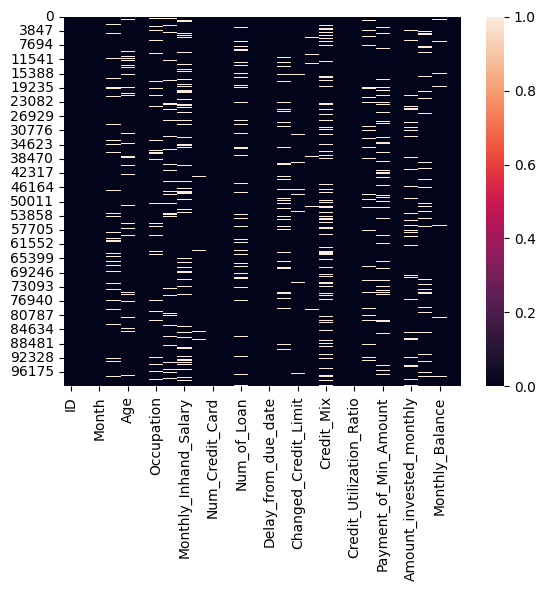

In [54]:
sns.heatmap(train.isnull())

In [55]:
train.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Age,92365.0,33.314145,1.077014e+01,14.000000,14.000000,24.000000,33.000000,42.000000,55.000000,5.600000e+01
Annual_Income,93020.0,178578.964199,1.442878e+06,7005.930000,7534.185000,19435.600000,37550.740000,72843.380000,483847.780000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,531.875417,1625.568229,3093.745000,5957.448333,13814.930000,1.520463e+04
Num_Bank_Accounts,98655.0,5.368466,2.592011e+00,0.000000,0.000000,3.000000,5.000000,7.000000,10.000000,1.000000e+01
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,1.000000,4.000000,5.000000,7.000000,849.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,1.000000,8.000000,13.000000,20.000000,2865.010000,5.797000e+03
Num_of_Loan,90892.0,3.534172,2.447488e+00,0.000000,0.000000,2.000000,3.000000,5.000000,9.000000,9.000000e+00
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,0.000000,10.000000,18.000000,28.000000,61.000000,6.700000e+01
Num_of_Delayed_Payment,90254.0,31.055809,2.269526e+02,0.000000,0.000000,9.000000,14.000000,18.000000,27.000000,4.397000e+03
Changed_Credit_Limit,97909.0,10.389025,6.789496e+00,-6.490000,-1.540000,5.320000,9.400000,14.870000,28.810000,3.697000e+01


#### Name & Age & Occupation   & Annual_Income  & Num_Bank_Accounts   & Num_of_Loan

In [56]:

cols = ['Name', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan']
for col in cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [57]:
# train.iloc[6065:6073,:]

##### Monthly_Inhand_Salary

In [58]:
train["Monthly_Inhand_Salary"].fillna(train["Annual_Income"] / 12, inplace=True)

In [59]:
# train.iloc[6065:6073,:]

In [60]:
# train.isnull().sum()

### Amount_invested_monthly & Changed_Credit_Limit & Num_of_Delayed_Payment

In [61]:

cols = ['Amount_invested_monthly', 'Changed_Credit_Limit',"Num_of_Delayed_Payment","Monthly_Balance"]
for col in cols:
    customer_mean = train.groupby('Customer_ID')[col].transform('mean')
    train[col] = train[col].fillna(customer_mean)
print(train[cols].isnull().sum())

Amount_invested_monthly    0
Changed_Credit_Limit       0
Num_of_Delayed_Payment     0
Monthly_Balance            0
dtype: int64


### Num_Credit_Inquiries   &  Credit_Mix     & Outstanding_Debt   & Credit_History_Age   & Payment_of_Min_Amount    &Payment_Behaviour

In [62]:

cols = ['Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 
        'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']
def fill_with_mode(group):
    return group.fillna(group.mode()[0] if not group.mode().empty else group)
for col in cols:
    train[col] = train.groupby('Customer_ID')[col].transform(fill_with_mode)
print(train[cols].isnull().sum())


Num_Credit_Inquiries     0
Credit_Mix               0
Outstanding_Debt         0
Credit_History_Age       0
Payment_of_Min_Amount    0
Payment_Behaviour        0
dtype: int64


####  dealing with Outliers

In [63]:

for col in train.select_dtypes(include=['number']).columns:
    q95 = np.percentile(train[col], 95)  
    q5 = np.percentile(train[col], 2)    

    
    train.loc[train[col] > q95, col] = q95 
    train.loc[train[col] < q5, col] = q5    

#### drop unwanted columns 

In [64]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

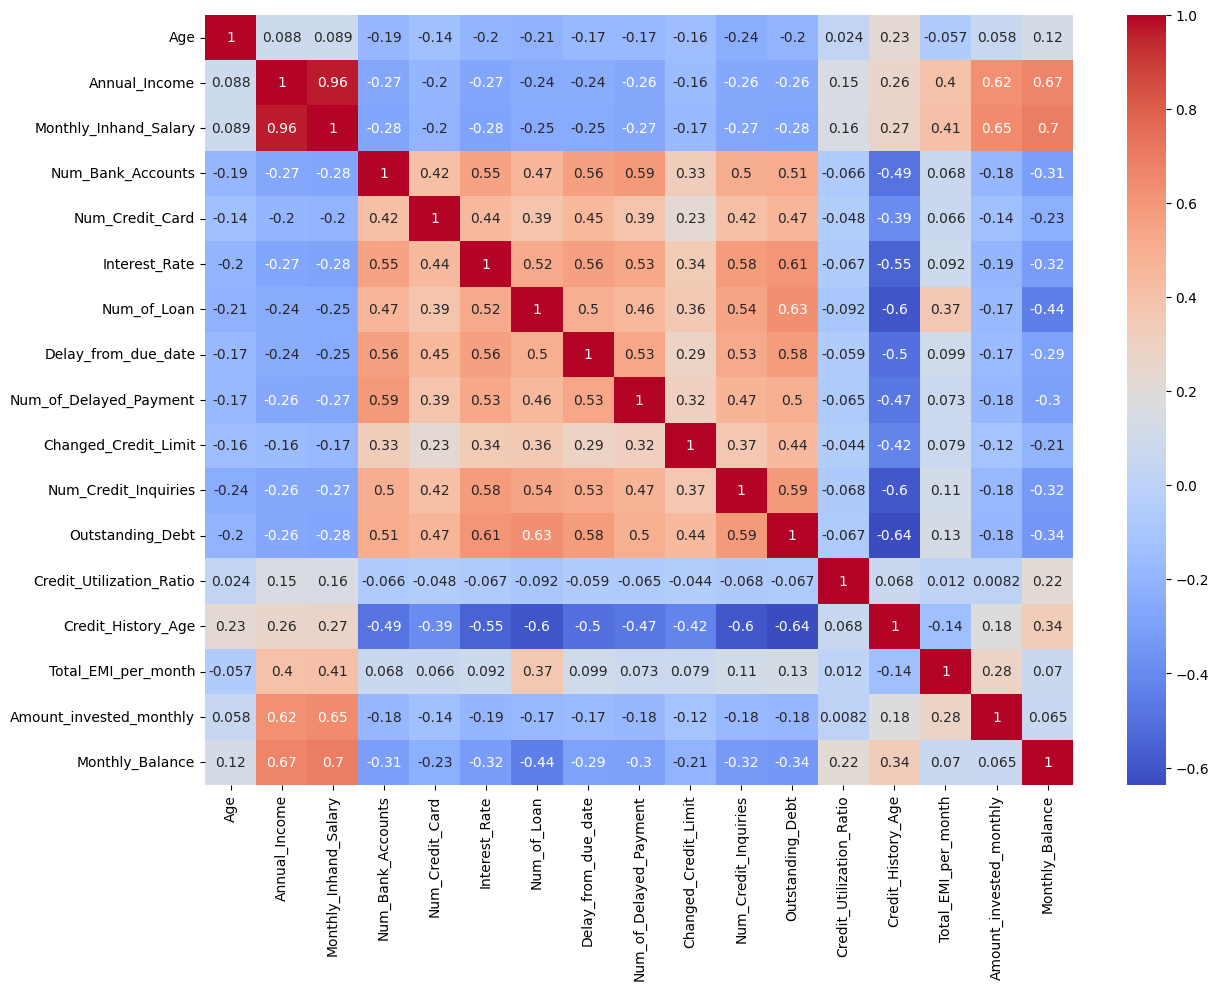

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = train.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [66]:

x_train_vif = train.select_dtypes(include=[np.number])


vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


                     Feature        VIF
2      Monthly_Inhand_Salary  62.163901
1              Annual_Income  40.145051
12  Credit_Utilization_Ratio  29.994141
16           Monthly_Balance  27.905617
4            Num_Credit_Card  10.943693
0                        Age  10.535260
3          Num_Bank_Accounts  10.273234
8     Num_of_Delayed_Payment  10.229807
13        Credit_History_Age  10.171305
15   Amount_invested_monthly   9.220933
6                Num_of_Loan   8.219599
5              Interest_Rate   7.883094
11          Outstanding_Debt   6.747191
10      Num_Credit_Inquiries   6.680176
7        Delay_from_due_date   6.262135
9       Changed_Credit_Limit   4.681185
14       Total_EMI_per_month   3.420840


In [67]:
train.drop(columns=["ID", "Customer_ID", "SSN", "Name","Type_of_Loan","Credit_Utilization_Ratio","Monthly_Inhand_Salary","Annual_Income","Monthly_Balance"], inplace=True)


### Encoding

In [68]:

categorical_columns = train.select_dtypes(include=["object"]).columns
print(categorical_columns)


Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [69]:

# Features to be ordinally encoded
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Features to be one-hot encoded
onehot_features = ['Occupation',"Month"]

# Define the ordinal categories for each feature
credit_mix_order = ['Bad', 'Standard', 'Good', 'Unknown']  # Adjusted based on value counts
payment_min_order = ['No', 'Yes']  # Binary (No < Yes)
payment_behaviour_order = ['Low_spent_Small_value_payments', 
                           'Low_spent_Medium_value_payments',
                           'Low_spent_Large_value_payments', 
                           'High_spent_Small_value_payments',
                           'High_spent_Medium_value_payments', 
                           'High_spent_Large_value_payments'] 

# Specify the order for these features
ordinal_categories = [credit_mix_order, payment_min_order, payment_behaviour_order]

# Define the column transformer with OrdinalEncoder and OneHotEncoder
column_transformed = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_categories, dtype=int, handle_unknown="use_encoded_value", unknown_value=-100), ordinal_features),  # Ordinal encoding
    (OneHotEncoder(handle_unknown="ignore", dtype=int), onehot_features),  # One-hot encoding
    remainder='passthrough',  # Leave other features as is
    verbose_feature_names_out=False)

In [71]:
train=column_transformed.fit_transform(train)



In [72]:
features = column_transformed.get_feature_names_out()
features

array(['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_Media_Manager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Month_April', 'Month_August', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Age',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Credit_Score'], dtype=object)

In [73]:
train = pd.DataFrame(train, columns=features)
train.head()

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,2,0,3,0,0,0,0,0,0,0,...,4.0,3,7.0,11.27,4.0,809.98,265.0,49.574949,80.415295,Good
1,2,0,2,0,0,0,0,0,0,0,...,4.0,1,5.6,11.27,4.0,809.98,265.0,49.574949,118.280222,Good
2,2,0,1,0,0,0,0,0,0,0,...,4.0,3,7.0,10.27,4.0,809.98,267.0,49.574949,81.699521,Good
3,2,0,0,0,0,0,0,0,0,0,...,4.0,5,4.0,6.27,4.0,809.98,268.0,49.574949,199.458074,Good
4,2,0,4,0,0,0,0,0,0,0,...,4.0,6,5.6,11.27,4.0,809.98,269.0,49.574949,41.420153,Good


### label encoding

In [74]:
lb=LabelEncoder()
train["Credit_Score"] = lb.fit_transform(train["Credit_Score"])



In [75]:
train["Credit_Score"].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

##### scaling

In [76]:
columns_to_scale = [
    'Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly'
]


In [78]:
X=train.drop("Credit_Score",axis=1)
Y=train["Credit_Score"]

In [79]:
x_train_valid,x_test,y_train_valid,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [80]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_valid,y_train_valid,test_size=0.2,random_state=1234)

In [81]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train[columns_to_scale]) 
X_valid_scaled = scaler.fit_transform(x_valid[columns_to_scale]) 
X_test_scaled = scaler.fit_transform(x_test[columns_to_scale]) 

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
# cols_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance','Num_of_Delayed_Payment',"Amount_invested_monthly"]
# for col in cols_to_convert:
#     test[col] = pd.to_numeric(test[col], errors='coerce')

In [ ]:
# import numpy as np
# import pandas as pd
# import re

# # Ensure train dataset exists for computing statistics
# # train = pd.read_csv("train.csv")
# # test = pd.read_csv("test.csv")

# ### 1️⃣ Handle Outliers for Specific Columns (Using Train Percentiles) ###
# cols = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan']
# percentile_98 = train[cols].quantile(0.98)  # Compute from train

# for col in cols:
#     test.loc[(test[col] > percentile_98[col]) | (test[col] < 0), col] = np.nan  # Apply same threshold to test

# ### 2️⃣ Handle Missing Categorical Values ###
# test["Credit_Mix"] = test["Credit_Mix"].replace("_", np.nan)
# test["Payment_of_Min_Amount"].replace("NM", np.nan, inplace=True)
# test["Type_of_Loan"].replace([np.NaN], "Not Specified", inplace=True)
# test["Occupation"] = test["Occupation"].replace("_______", np.nan)
# test["Payment_Behaviour"].replace("!@9#%8", np.nan, inplace=True)

# ### 3️⃣ Convert 'Credit_History_Age' to Months ###
# def convert_to_months(text):
#     match = re.match(r"(\d+) Years? and (\d+) Months?", str(text))
#     if match:
#         years = int(match.group(1))
#         months = int(match.group(2))
#         return years * 12 + months
#     return None

# test["Credit_History_Age"] = test["Credit_History_Age"].apply(convert_to_months)

# ### 4️⃣ Handle Negative Values ###
# test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].apply(lambda x: -x if x < 0 else x)

# ### 5️⃣ Fill Missing Values Using Forward & Backward Fill ###
# cols = ['Name', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan']

# bfill_df = test[cols].bfill()
# ffill_df = test[cols].ffill()
# test[cols] = test[cols].where(bfill_df != ffill_df, bfill_df)  
# test[cols] = test[cols].fillna(ffill_df)  

# ### 6️⃣ Compute Monthly In-Hand Salary ###
# test["Monthly_Inhand_Salary"].fillna(test["Annual_Income"] / 12, inplace=True)

# ### 7️⃣ Fill Missing Values Using Customer-wise Mean ###
# cols = ['Amount_invested_monthly', 'Changed_Credit_Limit', "Num_of_Delayed_Payment", "Monthly_Balance"]

# for col in cols:
#     customer_mean_test = test.groupby('Customer_ID')[col].transform('mean')
#     test[col] = test[col].fillna(customer_mean_test)

# ### 8️⃣ Fill Missing Categorical Values Using Mode ###
# cols = ['Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 
#         'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# def fill_with_mode(group):
#     return group.fillna(group.mode()[0] if not group.mode().empty else group)

# for col in cols:
#     test[col] = test.groupby('Customer_ID')[col].transform(fill_with_mode)

# ### 9️⃣ Handle Outliers Using Percentile Clipping (Using Train Percentiles) ###
# for col in test.select_dtypes(include=['number']).columns:

#     test.loc[test[col] > q95, col] = q95
#     test.loc[test[col] < q5, col] = q5

# test.drop(columns=["ID", "Customer_ID", "SSN", "Name","Type_of_Loan","Credit_Utilization_Ratio","Monthly_Inhand_Salary","Annual_Income","Monthly_Balance"], inplace=True)



----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [82]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None, random_state=1234)
lr.fit(X_train_scaled, y_train)


LogisticRegression(penalty=None, random_state=1234)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [84]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid, lr.predict(X_valid_scaled), average='macro')  
print("Precision Score:", precision)


Precision Score: 0.6304827140102479


In [85]:
recall_score(y_valid, lr.predict(X_valid_scaled), average='macro')

0.5434422437735233

In [86]:
f1_score(y_valid, lr.predict(X_valid_scaled),average='macro')

0.560099835953207

In [87]:
print(classification_report(y_valid, lr.predict(X_valid_scaled)))

              precision    recall  f1-score   support

           0       0.60      0.26      0.36      2823
           1       0.65      0.58      0.61      4563
           2       0.64      0.80      0.71      8614

    accuracy                           0.64     16000
   macro avg       0.63      0.54      0.56     16000
weighted avg       0.64      0.64      0.62     16000



## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

`Bonus:` You can use `solver='saga'` parameter to be able to try the $l_1$ regularization and compare the two.

In [88]:
lr_regualized=LogisticRegression(solver="saga")

In [89]:
lr_regualized.fit(X_train_scaled, y_train)

LogisticRegression(solver='saga')

In [90]:
print(classification_report(y_valid, lr_regualized.predict(X_valid_scaled)))

              precision    recall  f1-score   support

           0       0.60      0.26      0.36      2823
           1       0.65      0.58      0.61      4563
           2       0.64      0.80      0.71      8614

    accuracy                           0.64     16000
   macro avg       0.63      0.54      0.56     16000
weighted avg       0.64      0.64      0.62     16000



In [91]:
lr_regualized_2=LogisticRegression(penalty="l1",solver="saga")

In [93]:
lr_regualized_2.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
print(classification_report(y_valid, lr_regualized_2.predict(X_valid_scaled)))

## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {"C": [1.0, 2, 2.5, 3], "class_weight": ["balanced"], "solver": ["lbfgs"], "penalty": ["l2"]},
    {"C": [1.0, 2, 2.5, 3], "class_weight": ["balanced"], "solver": ["saga"], "penalty": ["l1", "l2"]}
]

log_reg = LogisticRegression(max_iter=200) 

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.597375


-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.

Try this and do hyperparameter tuning if needed to decide which model is better.

`Notes:`
- You will have to set `loss='log_loss'` to use `SGDClassifier` as a logistic regression model.
- The `alpha` parameter is the inverse of the `C` parameter and hence bigger values will result in more regularization.



In [96]:
sgd_clf = SGDClassifier(loss='log_loss',alpha=0.001, random_state=42)

In [97]:
sgd_clf.fit(X_train_scaled,y_train)

SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

In [98]:
print(classification_report(y_valid, sgd_clf.predict(X_valid_scaled)))

              precision    recall  f1-score   support

           0       0.58      0.21      0.31      2823
           1       0.64      0.56      0.60      4563
           2       0.63      0.80      0.71      8614

    accuracy                           0.63     16000
   macro avg       0.62      0.53      0.54     16000
weighted avg       0.62      0.63      0.61     16000



------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [99]:
print(classification_report(y_test, sgd_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.58      0.21      0.31      3632
           1       0.64      0.50      0.56      5759
           2       0.61      0.82      0.70     10609

    accuracy                           0.61     20000
   macro avg       0.61      0.51      0.52     20000
weighted avg       0.61      0.61      0.59     20000



In [100]:
print(classification_report(y_test, lr_regualized_2.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.61      0.28      0.39      3632
           1       0.64      0.51      0.57      5759
           2       0.62      0.80      0.70     10609

    accuracy                           0.62     20000
   macro avg       0.62      0.53      0.55     20000
weighted avg       0.62      0.62      0.60     20000



In [101]:
print(classification_report(y_test, lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.61      0.28      0.39      3632
           1       0.64      0.51      0.57      5759
           2       0.62      0.80      0.70     10609

    accuracy                           0.62     20000
   macro avg       0.63      0.53      0.55     20000
weighted avg       0.63      0.62      0.61     20000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [ ]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', RobustScaler())                   
])

# 2️⃣ Handling Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),       
    ('classifier', SGDClassifier(loss='log_loss', random_state=1234))  
])

model_pipeline.fit(X_train_scaled,y_train )

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$